#### Import packages

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

#### Process data and plot specific station

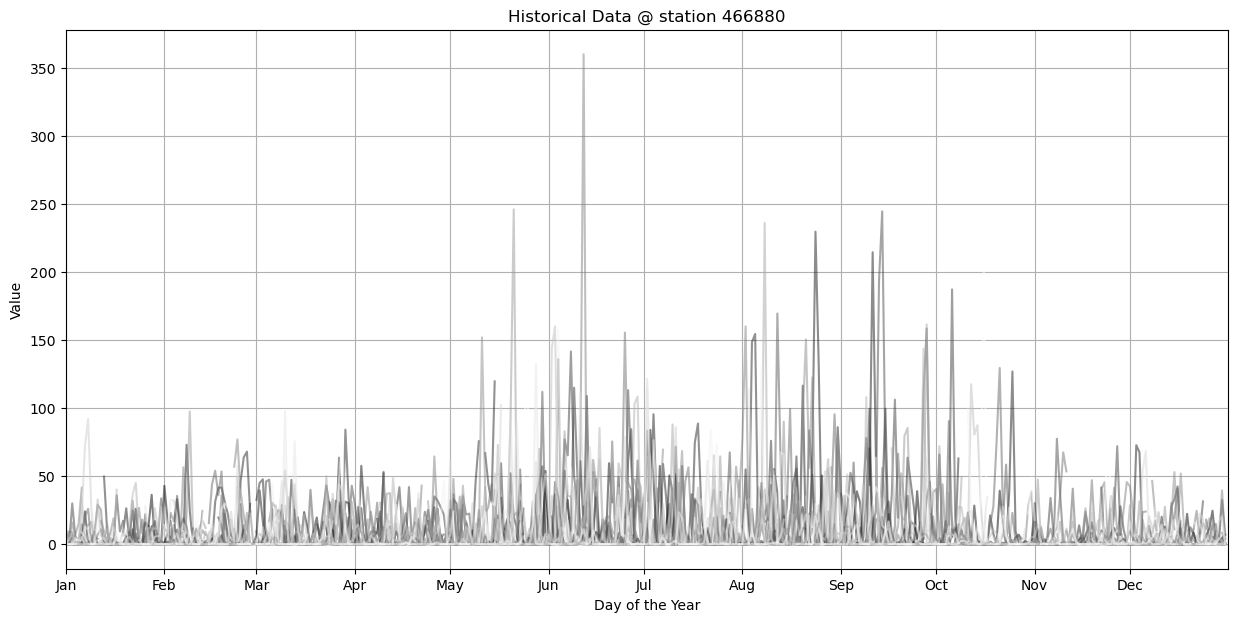

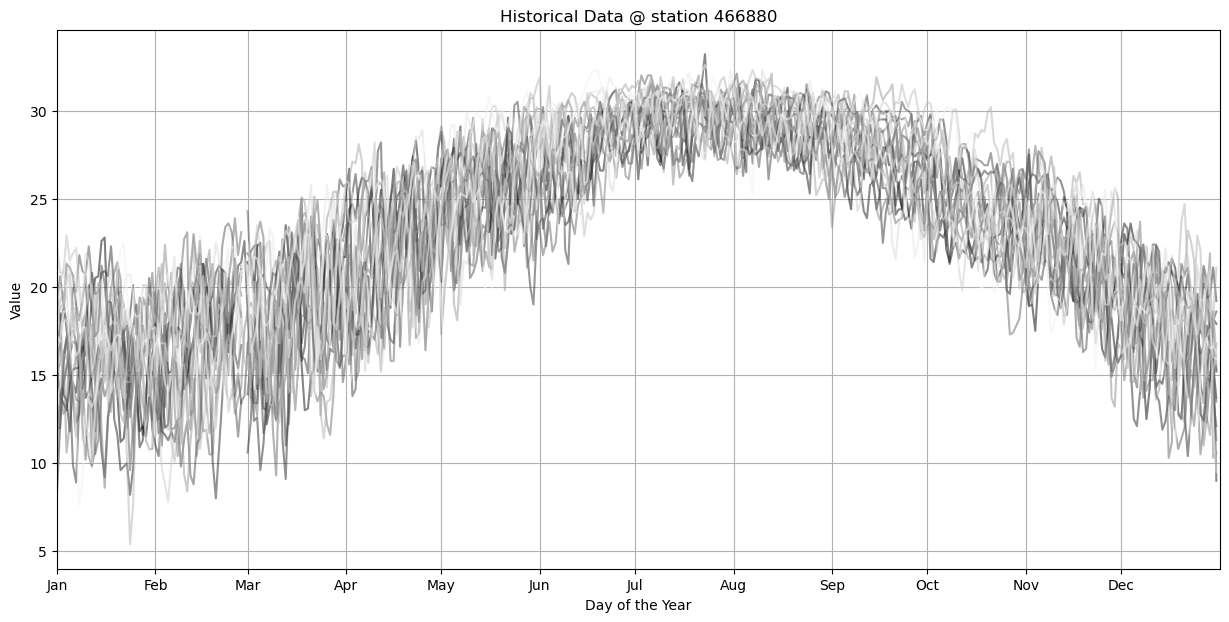

In [13]:
current_dir = os.getcwd()
st_dy_path = current_dir + '/data/st_dy/'
station_names = [466880, 466881, 466900, 466910, 466920, 466921, 466930, 466940, 466950, 
                466990, 467050, 467060, 467080, 467110, 467270, 467300, 467350, 467410,
                467420, 467440, 467441, 467480, 467490, 467530, 467540, 467550, 467570,
                467571, 467590, 467610, 467620, 467650, 467660, 467770, 467780, 467990,]
special_values = [-999.1, -9.6, -999.6, -9.5, -99.5, -999.5, -9999.5, -9.7, 
                  -99.7, -999.7, -9999.7, -9.8, -9998, -9999.0, -9999.9, None]


# Load the data for a given station and clean it by replacing special values with NaN
def load_data_and_clean(station_name, special_values):
    """
    Load the data for a given station and clean it by replacing special values with NaN.

    Parameters:
    station_name (str): The name of the station.
    special_values (list): A list of special values to be replaced with NaN.

    Returns:
    tuple: A tuple containing the cleaned precipitation data and temperature data.
    """

    # Load the data
    precipitation_data = pd.read_csv(st_dy_path + str(station_name) + '_precipitation.csv')
    temperature_data = pd.read_csv(st_dy_path + str(station_name) + '_temperature.csv')

    # Replace special values with NaN
    precipitation_data.replace(special_values, np.nan, inplace=True)
    temperature_data.replace(special_values, np.nan, inplace=True)
    precipitation_data[precipitation_data < -10] = np.nan
    temperature_data[temperature_data < -10] = np.nan

    return precipitation_data, temperature_data


# Plot the historical data of a specific station
def plot_historical_data(data, year_column='year'):
    """
    Plot historical data across all years using grayscale for the legend, cleaned with NaN for special values and outliers below -10.
    
    Args:
    data (pd.DataFrame): The dataset.
    year_column (str): The name of the column representing the year.
    """
    data_cleaned = data.dropna(subset=[year_column])
    years = data_cleaned[year_column].values
    days = data_cleaned.columns[1:]
    
    min_year, max_year = min(years), max(years)
    year_range = max_year - min_year
    
    plt.figure(figsize=(15, 7))
    
    for year in years:
        year_data = data_cleaned[data_cleaned[year_column] == year]
        gray_value = (year - min_year) / year_range
        plt.plot(days, year_data.values[0][1:], marker='', linestyle='-', alpha=0.5, color=str(gray_value))
    
    # Define a dictionary to map the column values to month abbreviations
    month_mapping = {
        101: 'Jan', 201: 'Feb', 301: 'Mar', 401: 'Apr', 501: 'May', 601: 'Jun',
        701: 'Jul', 801: 'Aug', 901: 'Sep', 1001: 'Oct', 1101: 'Nov', 1201: 'Dec'}
    
    # Update xticks with month mapping
    xticks = [str(day) for day in days if int(day) in month_mapping]
    xlabels = [month_mapping[int(day)] for day in days if int(day) in month_mapping]
    plt.xticks(xticks, xlabels)
    plt.xlabel('Day of the Year')
    plt.ylabel('Value')
    plt.title(f'Historical Data @ station {station_names[0]}')
    plt.xlim(0, 366)
    plt.grid(True)
    plt.show()


precipitation_data, temperature_data = load_data_and_clean(station_names[0], special_values)
plot_historical_data(precipitation_data)
plot_historical_data(temperature_data)

#### Plot the average among stations

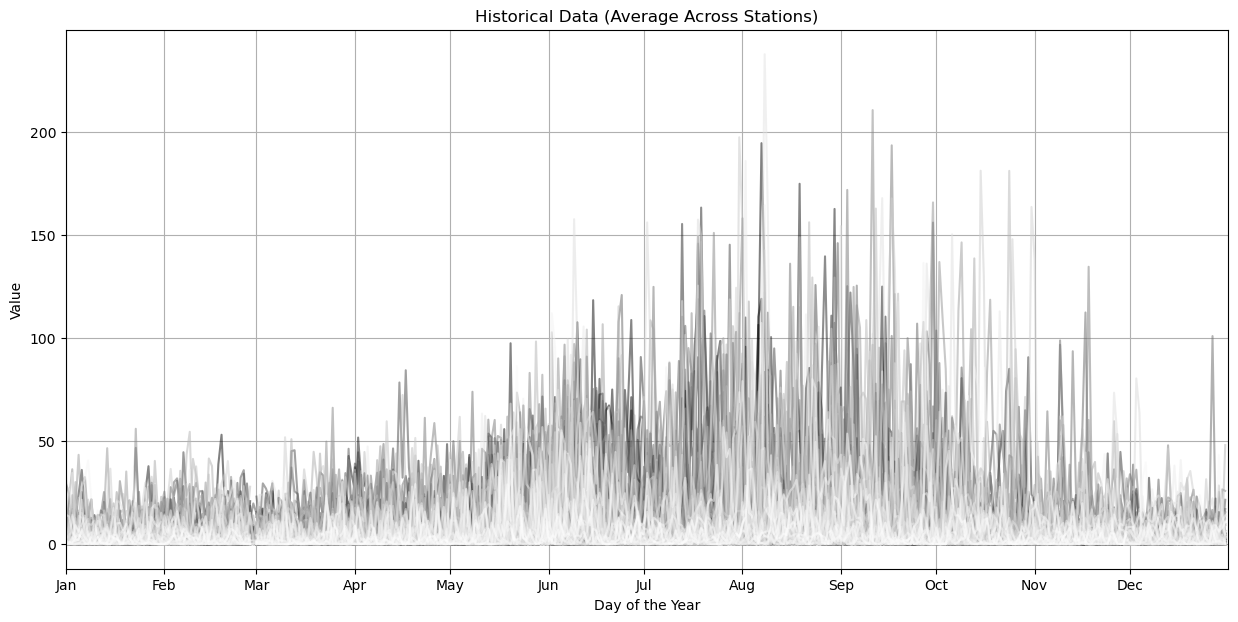

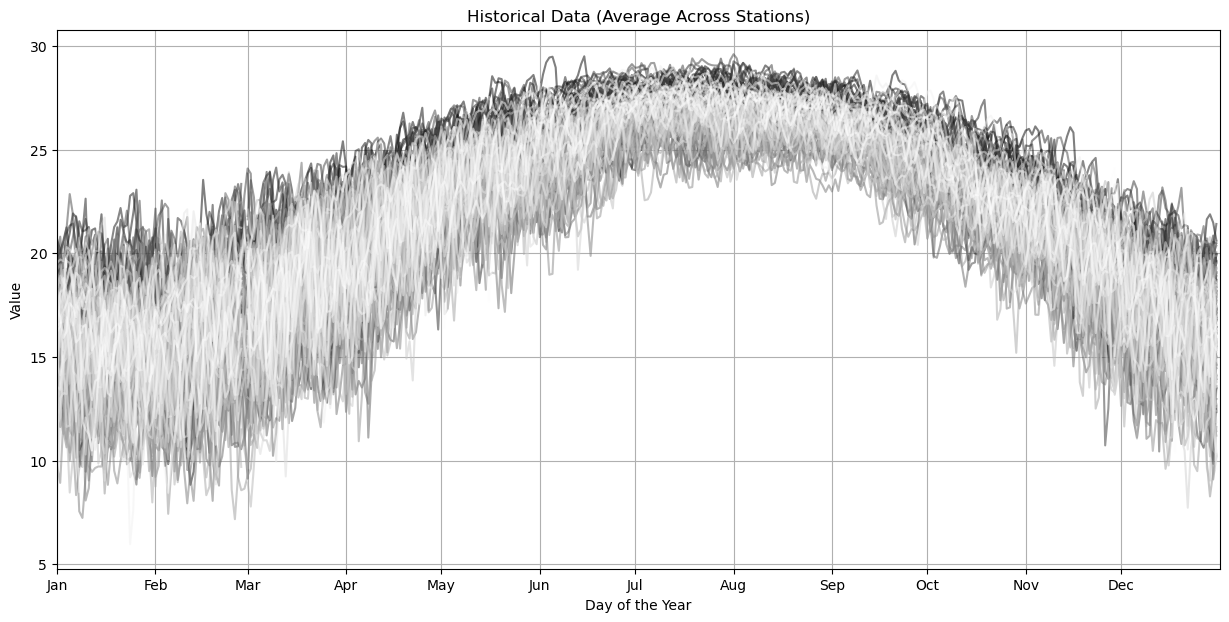

In [14]:
# Calculate the average data across all stations
def calculate_stat_data(station_names, special_values):
    """
    Calculate statistical data for precipitation and temperature across multiple stations.

    Parameters:
    - station_names (list): A list of station names.
    - special_values (list): A list of special values to be cleaned from the data.

    Returns:
    - avg_precipitation_data (DataFrame): Average precipitation data across all stations.
    - avg_temperature_data (DataFrame): Average temperature data across all stations.
    - std_precipitation_data (DataFrame): Standard deviation of precipitation data across all stations.
    - std_temperature_data (DataFrame): Standard deviation of temperature data across all stations.
    - q1_precipitation_data (DataFrame): First quartile of precipitation data across all stations.
    - q1_temperature_data (DataFrame): First quartile of temperature data across all stations.
    - q3_precipitation_data (DataFrame): Third quartile of precipitation data across all stations.
    - q3_temperature_data (DataFrame): Third quartile of temperature data across all stations.
    """
    all_precipitation_data = []
    all_temperature_data = []
    
    for station in station_names:
        precip_data, temp_data = load_data_and_clean(station, special_values)
        all_precipitation_data.append(precip_data)
        all_temperature_data.append(temp_data)
    
    # Calculate the average data across all stations
    avg_precipitation_data = pd.concat(all_precipitation_data).groupby('year').mean().reset_index()
    avg_temperature_data = pd.concat(all_temperature_data).groupby('year').mean().reset_index()
    
    # Calculate std across all stations
    std_precipitation_data = pd.concat(all_precipitation_data).groupby('year').std().reset_index()
    std_temperature_data = pd.concat(all_temperature_data).groupby('year').std().reset_index()
    
    # Calculate Q1 and Q3 across all stations
    q1_precipitation_data = pd.concat(all_precipitation_data).groupby('year').quantile(0.25).reset_index()
    q1_temperature_data = pd.concat(all_temperature_data).groupby('year').quantile(0.25).reset_index()
    q3_precipitation_data = pd.concat(all_precipitation_data).groupby('year').quantile(0.75).reset_index()
    q3_temperature_data = pd.concat(all_temperature_data).groupby('year').quantile(0.75).reset_index()
    
    return (avg_precipitation_data, avg_temperature_data, 
            std_precipitation_data, std_temperature_data, 
            q1_precipitation_data,  q1_temperature_data,
            q3_precipitation_data,  q3_temperature_data,)

# Plot historical data for average precipitation and temperature
def plot_historical_data_avg(data, year_column='year'):
    """
    Plot historical data across all years using grayscale for the legend, cleaned with NaN for special values and outliers below -10.
    
    (Same as plot_historical_data, but modify the title: average data across all stations.)
    
    Args:
    data (pd.DataFrame): The dataset.
    year_column (str): The name of the column representing the year.
    """
    data_cleaned = data.dropna(subset=[year_column])
    years = data_cleaned[year_column].values
    days = data_cleaned.columns[1:]
    
    min_year, max_year = min(years), max(years)
    year_range = max_year - min_year
    
    plt.figure(figsize=(15, 7))
    
    for year in years:
        year_data = data_cleaned[data_cleaned[year_column] == year]
        gray_value = (year - min_year) / year_range
        plt.plot(days, year_data.values[0][1:], marker='', linestyle='-', alpha=0.5, color=str(gray_value))
    
    # Define a dictionary to map the column values to month abbreviations
    month_mapping = {
        101: 'Jan', 201: 'Feb', 301: 'Mar', 401: 'Apr', 501: 'May', 601: 'Jun',
        701: 'Jul', 801: 'Aug', 901: 'Sep', 1001: 'Oct', 1101: 'Nov', 1201: 'Dec'}
    
    # Update xticks with month mapping
    xticks = [str(day) for day in days if int(day) in month_mapping]
    xlabels = [month_mapping[int(day)] for day in days if int(day) in month_mapping]
    plt.xticks(xticks, xlabels)
    plt.xlabel('Day of the Year')
    plt.ylabel('Value')
    plt.title('Historical Data (Average Across Stations)')
    plt.xlim(0, 366)
    plt.grid(True)
    plt.show()

# Calculate the average data across all stations
data_stat = calculate_stat_data(station_names, special_values)
avg_precipitation_data, avg_temperature_data, = data_stat[0], data_stat[1]

# Plot historical data for average precipitation and temperature
plot_historical_data_avg(avg_precipitation_data)
plot_historical_data_avg(avg_temperature_data)

#### Calculate statistic on historical data across the stations

In [15]:
def is_valid_date(date):
    """
    Check if the date is valid.

    Parameters:
    date (str): The date to check (e.g., '0130' for Jan 30th).

    Returns:
    bool: True if the date is valid, False otherwise.
    """
    try:
        date = int(date)
    except ValueError("invalid date"):
        return False

    month_day = int(date % 100)
    month = int(date // 100)

    if (month == 1 and 1 <= month_day <= 31) or \
       (month == 2 and 1 <= month_day <= 29) or \
       (month == 3 and 1 <= month_day <= 31) or \
       (month == 4 and 1 <= month_day <= 30) or \
       (month == 5 and 1 <= month_day <= 31) or \
       (month == 6 and 1 <= month_day <= 30) or \
       (month == 7 and 1 <= month_day <= 31) or \
       (month == 8 and 1 <= month_day <= 31) or \
       (month == 9 and 1 <= month_day <= 30) or \
       (month == 10 and 1 <= month_day <= 31) or \
       (month == 11 and 1 <= month_day <= 30) or \
       (month == 12 and 1 <= month_day <= 31):
        return True
    return False

def month_days(month):
    """
    Get the number of days in a specific month.

    Parameters:
    month (int): The month number (e.g., 1 for January).

    Returns:
    int: The number of days in the specified month.
    """
    if month == 2:
        return 29
    elif month in [4, 6, 9, 11]:
        return 30
    return 31

def concatenate_station_data_for_date(station_names, special_values, date):
    """
    Concatenate and compute statistics for all stations on a specific date.

    Parameters:
    station_names (list): List of station names.
    special_values (list): List of special values to be replaced with NaN.
    date (str): The specific date column to analyze (e.g., '101' for Jan 1st).

    Returns:
    dict: A dictionary containing mean and other statistics for precipitation and temperature on the specified date.
    """
    if not is_valid_date(date):
        raise ValueError ("Invalid date. Please provide a valid date in the format 'mmdd' (e.g., '101' for Jan 1st).")

    date = str(int(date))

    all_precipitation_data = []
    all_temperature_data = []
    
    for station in station_names:
        precip_data, temp_data = load_data_and_clean(station, special_values)
        if date in precip_data.columns:
            all_precipitation_data.append(precip_data[date])
        if date in temp_data.columns:
            all_temperature_data.append(temp_data[date])
    
    all_precipitation_data = pd.concat(all_precipitation_data, ignore_index=True)
    all_temperature_data = pd.concat(all_temperature_data, ignore_index=True)
    
    stats = {
        'precipitation_mean': all_precipitation_data.mean(),
        'temperature_mean': all_temperature_data.mean(),
        'precipitation_data': all_precipitation_data,
        'temperature_data': all_temperature_data,
        'precipitation_std': all_precipitation_data.std(),
        'temperature_std': all_temperature_data.std(),
        'precipitation_q1': all_precipitation_data.quantile(0.25),
        'temperature_q1': all_temperature_data.quantile(0.25),
        'precipitation_q3': all_precipitation_data.quantile(0.75),
        'temperature_q3': all_temperature_data.quantile(0.75),
    }
    
    return stats

def concatenate_date_range_data(station_number, special_values, date):
    """
    Concatenate and compute statistics for all stations on a specific date range.

    Parameters:
    station_number (int): The station number.
    special_values (list): List of special values to be replaced with NaN.
    date (str): The specific date (e.g., '0101' for Jan 1st).

    Returns:
    dict: A dictionary containing mean and other statistics for precipitation and temperature on the specified date range.
    """
    if not is_valid_date(date[:4]) or not is_valid_date(date[5:]):
        raise ValueError ("Invalid date. Please provide a valid date range in the format 'mmdd-mmdd' (e.g., '0101-1231' for Jan 1st to Dec 31st).")

    today = int(date[:4])
    today_month = int(today // 100)
    today_date = int(today % 100)
    if today_date <= 3:
        if today_month == 1:
            start_month = 12
        else:
            start_month = today_month - 1
        start_date = str(start_month) + str(month_days(start_month) - 3 + today_date)
    else:
        start_date = str(today - 3)
    if today_date >= month_days(today_month) - 2:
        if today_month == 12:
            end_month = 1
        else:
            end_month = today_month + 1
        end_date = str(end_month) + str(3-(month_days(today_month)-today_date))
    else:
        end_date = str(today + 3)

    all_precipitation_data = []
    all_temperature_data = []
    
    precip_data, temp_data = load_data_and_clean(station, special_values)
    if start_date in precip_data.columns and end_date in precip_data.columns:
        all_precipitation_data.append(precip_data.loc[:, start_date:end_date].mean(axis=1))
    if start_date in temp_data.columns and end_date in temp_data.columns:
        all_temperature_data.append(temp_data.loc[:, start_date:end_date].mean(axis=1))
    
    all_precipitation_data = pd.concat(all_precipitation_data, ignore_index=True)
    all_temperature_data = pd.concat(all_temperature_data, ignore_index=True)
    
    stats = {
        'precipitation_mean': all_precipitation_data.mean(),
        'temperature_mean': all_temperature_data.mean(),
        'precipitation_data': all_precipitation_data,
        'temperature_data': all_temperature_data,
        'precipitation_std': all_precipitation_data.std(),
        'temperature_std': all_temperature_data.std(),
        'precipitation_q1': all_precipitation_data.quantile(0.25),
        'temperature_q1': all_temperature_data.quantile(0.25),
        'precipitation_q3': all_precipitation_data.quantile(0.75),
        'temperature_q3': all_temperature_data.quantile(0.75),
    }
    
    return stats


# Example usage:
date = '0228'
stats = concatenate_station_data_for_date(station_names, special_values, date)
print("Precipitation Mean:", round(stats['precipitation_mean'], 2), 'mm', 
      'Std:', round(stats['precipitation_std'], 2), ', ', 
      'Q1:', round(stats['precipitation_q1'], 2), ', ', 
      'Q3:', round(stats['precipitation_q3'], 2))
print("Temperature Mean:", round(stats['temperature_mean'], 2), '°C', 
      'Std:', round(stats['temperature_std'], 2), ', ', 
      'Q1:', round(stats['temperature_q1'], 2), ', ', 
      'Q3:', round(stats['temperature_q3'], 2))

Precipitation Mean: 3.84 mm Std: 9.09 ,  Q1: 0.0 ,  Q3: 2.9
Temperature Mean: 16.93 °C Std: 5.2 ,  Q1: 14.7 ,  Q3: 20.6


In [16]:
def compare_today_to_history(today_date, today_temp, today_precip, station_names, special_values):
    """
    Compare today's temperature and precipitation to historical data.

    Parameters:
    today_temp (float): Today's mean temperature.
    today_precip (float): Today's mean precipitation.
    station_names (list): List of station names.
    special_values (list): List of special values to be replaced with NaN.

    Returns:
    dict: A dictionary containing the comparison results.
    """
    stats = concatenate_station_data_for_date(station_names, special_values, today_date)
    
    if 'error' in stats:
        return stats['error']
    
    temp_diff = (today_temp - stats['temperature_mean']) / stats['temperature_mean'] * 100
    precip_diff = (today_precip - stats['precipitation_mean']) / stats['precipitation_mean'] * 100
    
    result = {
        'temperature_comparison': f"Today's temperature is {temp_diff:.2f}% {'higher' if temp_diff > 0 else 'lower'} than the historical average.",
        'precipitation_comparison': f"Today's precipitation is {precip_diff:.2f}% {'higher' if precip_diff > 0 else 'lower'} than the historical average."
    }
    
    return result


# Example usage:
today_date = input("Enter today's date (e.g., '0101' for Jan 1st): ")
today_temp = float(input("Enter today's mean temperature (°C): "))
today_precip = float(input("Enter today's mean precipitation (mm): "))
result = compare_today_to_history(today_date, today_temp, today_precip, station_names, special_values)
print(result['temperature_comparison'])
print(result['precipitation_comparison'])

ValueError: array must not contain infs or NaNs

#### Plot PDF

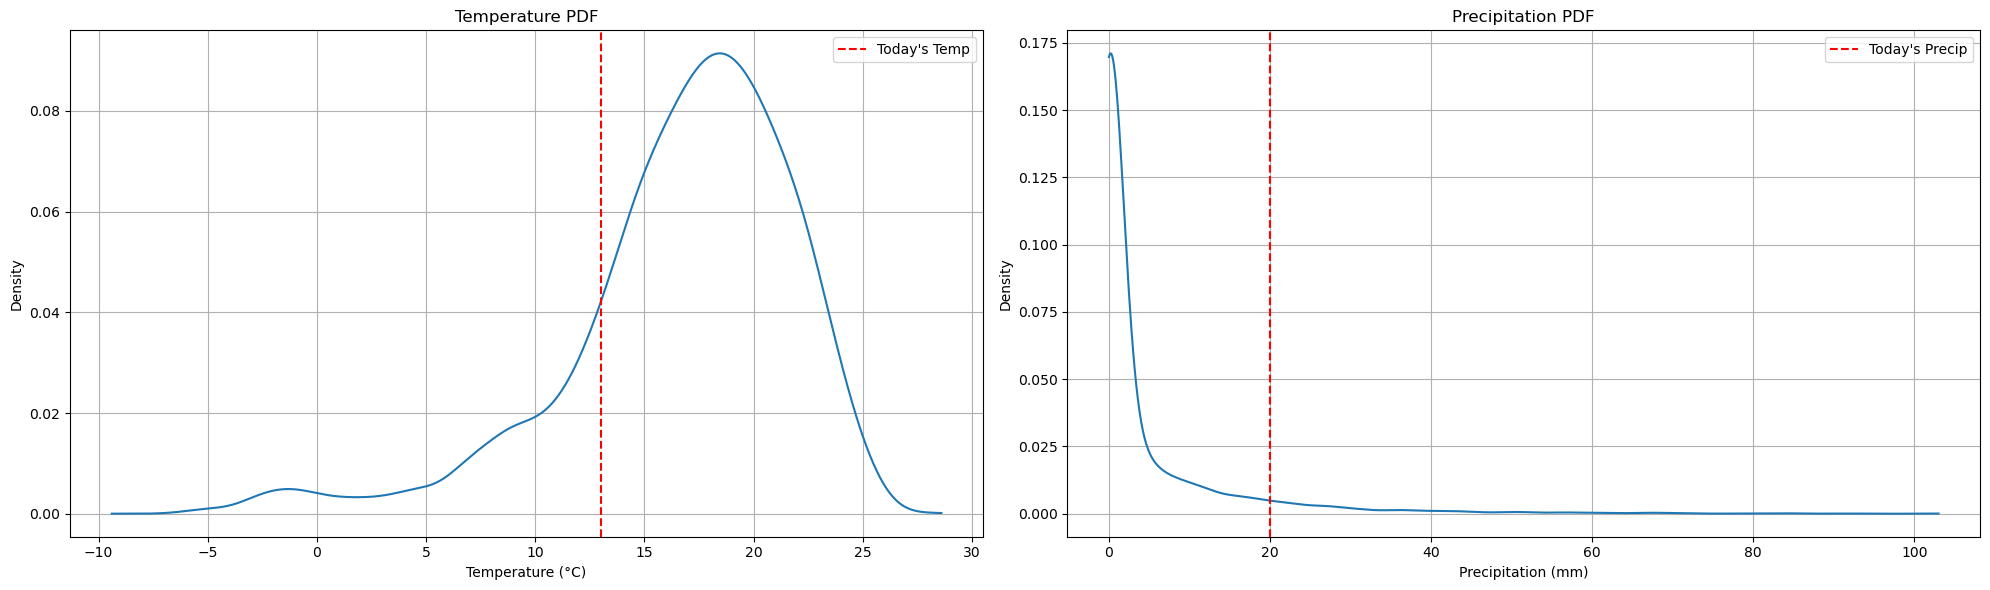

In [ ]:
def plot_historical_pdf_with_today(date, today_temp, today_precip, station_names, special_values):
    temp_list, precip_list = [], []
    for station in station_names:
        precip_data, temp_data = load_data_and_clean(station, special_values)
        for offset in range(-3, 4):
            new_date = str(int(date) + offset)
            if new_date in precip_data.columns:
                precip_list.append(precip_data[new_date].dropna())
            if new_date in temp_data.columns:
                temp_list.append(temp_data[new_date].dropna())
    
    combined_precip = pd.concat(precip_list)
    combined_temp = pd.concat(temp_list)

    # Plot temperature PDF
    plt.figure(figsize=(20, 6))

    plt.subplot(1, 2, 1)
    temp_density = gaussian_kde(combined_temp)
    x = np.linspace(min(combined_temp), max(combined_temp), 1000)
    plt.plot(x, temp_density(x))
    plt.axvline(today_temp, color='r', linestyle='--', label="Today's Temp")
    plt.title('Temperature PDF')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Density')
    plt.grid()
    plt.legend()

    # Plot precipitation PDF
    plt.subplot(1, 2, 2)
    precip_density = gaussian_kde(combined_precip)
    x = np.linspace(min(combined_precip), max(combined_precip), 1000)
    plt.plot(x, precip_density(x))
    plt.axvline(today_precip, color='r', linestyle='--', label="Today's Precip")
    plt.title('Precipitation PDF')
    plt.xlabel('Precipitation (mm)')
    plt.ylabel('Density')
    plt.legend()

    plt.tight_layout()
    plt.grid()
    plt.show()
    
# Example usage:
plot_historical_pdf_with_today(today_date, today_temp, today_precip, station_names, special_values)